In [99]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from properties.data.database import DatabaseContext
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor

First of all we clean the data removing any columns that are not valuable:

In [100]:
db = DatabaseContext('properties')
df = db.as_df()
# df = df[(df['stories'] < 7) & (df['garage_spaces'] < 7)]
df['market_value'].replace('', np.nan, inplace=True)
df.dropna(subset=['market_value'], inplace=True)
df['market_value'] = df['market_value'].astype(float)
df = df.drop(columns=['sale_date', 'latitude', 'longitude', 'total_area', 'market_value'])
# df = df.drop(columns = ['total_livable_area','museum', 'gas_station', 'coffee_shop', 'stadium',
#        'food', 'bar', 'gym', 'bridge', 'garden', 'park', 'river', 'city_hall',
#        'police_station', 'hospital', 'elementary_school', 'church', 'bank',
#        'supermarket', 'pharmacy', 'bus_stop', 'metro_station', 'train_station',
#        'university', 'laundromat'])

In [3]:
df

,fireplaces,garage_spaces,bathrooms,bedrooms,stories,total_livable_area,museum,gas_station,coffee_shop,stadium,...,church,bank,supermarket,pharmacy,bus_stop,metro_station,train_station,university,laundromat,sale_price
0,0,0,3,4,3,2028.0,1192.0,783.0,1592.0,2263.0,...,1588.0,1827.0,394.0,1088.0,762.0,1818.0,1013.0,1552.0,870.0,87500.0
1,0,0,3,4,3,2270.0,1096.0,1348.0,112.0,3590.0,...,889.0,1513.0,794.0,766.0,1751.0,1114.0,1394.0,1481.0,563.0,820000.0
2,0,0,2,3,3,2180.0,650.0,1014.0,337.0,3780.0,...,762.0,1072.0,375.0,327.0,1447.0,1134.0,1171.0,1158.0,805.0,776000.0
3,0,0,2,3,3,2160.0,2754.0,930.0,1198.0,996.0,...,874.0,1031.0,957.0,892.0,773.0,1166.0,2538.0,2535.0,298.0,55000.0
4,0,0,2,3,3,1456.0,2029.0,1291.0,1044.0,2911.0,...,875.0,1165.0,1231.0,1346.0,2346.0,1336.0,2018.0,2322.0,386.0,329600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,3,3,3,5,3,6996.0,903.0,1475.0,812.0,2494.0,...,410.0,209.0,618.0,1111.0,1321.0,1081.0,1227.0,1326.0,1105.0,1903000.0
8032,4,0,2,3,3,1833.0,1394.0,1163.0,740.0,2079.0,...,750.0,457.0,879.0,913.0,1737.0,1281.0,1263.0,1337.0,552.0,433000.0
8033,4,0,2,4,3,1960.0,945.0,1427.0,769.0,2444.0,...,424.0,245.0,622.0,1156.0,1330.0,1133.0,1221.0,1327.0,1052.0,767000.0
8034,5,0,3,3,3,3240.0,1278.0,1150.0,613.0,2122.0,...,717.0,615.0,817.0,1116.0,1555.0,1501.0,1268.0,1374.0,721.0,875000.0


Now we normalize our distance data

In [4]:
mms = MinMaxScaler()
df[['museum', 'gas_station', 'coffee_shop', 'stadium',
       'food', 'bar', 'gym', 'bridge', 'garden', 'park', 'river', 'city_hall',
       'police_station', 'hospital', 'elementary_school', 'church', 'bank',
       'supermarket', 'pharmacy', 'bus_stop', 'metro_station', 'train_station',
       'university', 'laundromat']] = mms.fit_transform(df[['museum', 'gas_station', 'coffee_shop', 'stadium',
       'food', 'bar', 'gym', 'bridge', 'garden', 'park', 'river', 'city_hall',
       'police_station', 'hospital', 'elementary_school', 'church', 'bank',
       'supermarket', 'pharmacy', 'bus_stop', 'metro_station', 'train_station',
       'university', 'laundromat']])

And our final data becomes

In [5]:
# Our data
y = df['sale_price']
# X1 = df.drop(columns=['sale_price'])
X1 = df

## One Hot

In [8]:
def one_hot(df, columns):
    for column in columns:
        oh = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis=1)
        df = pd.concat([df, oh], axis=1)
    return df

In [54]:
X = one_hot(X1, ['bedrooms', 'bathrooms', 'stories', 'fireplaces', 'garage_spaces'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train.describe()
y_test.describe()
# X_test = X_test.drop(columns=['sale_price'])



count    1.607000e+03
mean     3.224300e+05
std      2.678921e+05
min      2.421700e+04
25%      1.600000e+05
50%      2.600000e+05
75%      3.987500e+05
max      3.100000e+06
Name: sale_price, dtype: float64

## Running SVR

In [8]:
clf = SVR(gamma='scale', degree=5, C=1, epsilon=0.2)
clf.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred = clf.predict(X_test)

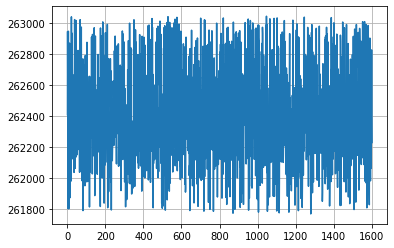

In [10]:
fig, ax = plt.subplots()
ax.plot(y_pred)

ax.grid()

plt.show()

In [11]:
mean_squared_error(y_pred, y_test)

60798259331.66813

## Running Linear Regression

/Users/chih/Documents/upenn/cis519/cis519/Project/real-estate-ml/.env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


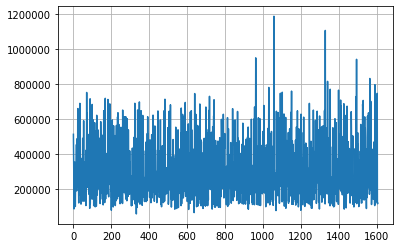

In [94]:
normalPriceX_train = X_train[X_train['sale_price'] <= 800000][X_train['sale_price'] >= 80000]
reg = LinearRegression().fit(normalPriceX_train.drop(columns=['sale_price']), y_train[y_train <= 800000][y_train >= 80000])
y_pred = reg.predict(X_test.drop(columns=['sale_price']))
fig, ax = plt.subplots()

ax.plot(y_pred)
ax.grid()
plt.show()

In [86]:
mean_squared_error(y_pred, y_test)

29093157271.74074

In [101]:
percent25Y_test = y_test[y_test <= 164787][y_test >= 80000]
percent50Y_test = y_test[y_test > 164787][y_test <= 262000]
percent75Y_test = y_test[y_test > 262000][y_test <= 800000]

percent25X_test = (X_test[X_test['sale_price'] <= 164787][X_test['sale_price'] >= 80000]).drop(columns=['sale_price'])
percent50X_test = X_test[X_test['sale_price'] <= 262000][X_test['sale_price'] > 164787].drop(columns=['sale_price'])
percent75X_test = X_test[X_test['sale_price'] > 262000][X_test['sale_price'] <= 800000].drop(columns=['sale_price'])




/Users/chih/Documents/upenn/cis519/cis519/Project/real-estate-ml/.env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/chih/Documents/upenn/cis519/cis519/Project/real-estate-ml/.env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/chih/Documents/upenn/cis519/cis519/Project/real-estate-ml/.env/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


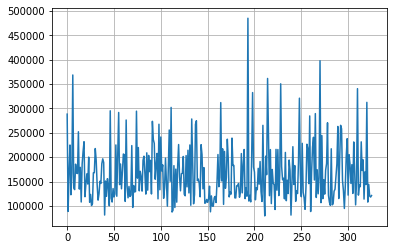

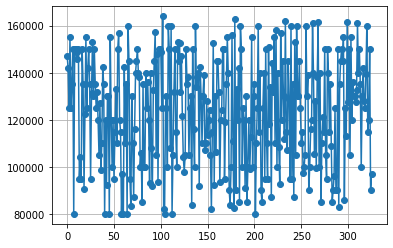

5132372587.858661

In [102]:
#25 predict

percent25Y_pred = reg.predict(percent25X_test)
fig, ax = plt.subplots()

ax.plot(percent25Y_pred)
ax.grid()
plt.show()

fig1, ax1 = plt.subplots()

y_test25 = []
for e in percent25Y_test.index:
    y_test25.append(percent25Y_test[e])

ax1.plot(y_test50, 'o')
ax1.grid()
plt.title('Test Data')
plt.ylim(80000, 500000)
plt.show()
mean_squared_error(percent25Y_pred, percent25Y_test)


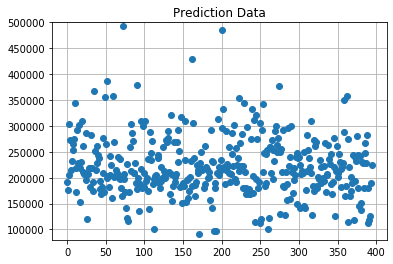

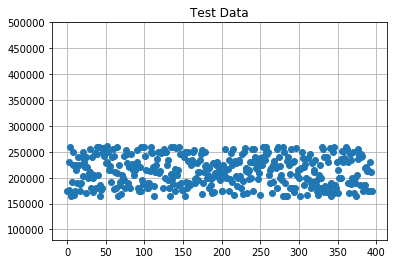

3461920896.433731

In [115]:
#50 predict

percent50Y_pred = reg.predict(percent50X_test)
fig, ax = plt.subplots()

ax.plot(percent50Y_pred, 'o')
ax.grid()
plt.title('Prediction Data')
plt.ylim(80000, 500000)
plt.show()

fig1, ax1 = plt.subplots()

y_test50 = []
for e in percent50Y_test.index:
    y_test50.append(percent50Y_test[e])

ax1.plot(y_test50, 'o')
ax1.grid()
plt.title('Test Data')
plt.ylim(80000, 500000)
plt.show()
mean_squared_error(percent50Y_pred, percent50Y_test)



In [123]:
def accuracy(y_true, y_pred, tolerance=0.4):
    score = 0
    for actual, pred in zip(y_true, y_pred):
        if (1 - tolerance) * actual < pred < (1 + tolerance) * actual:
            score += 1
    return score / len(y_true)

In [124]:
accuracy(y_test50, percent50Y_pred)

0.8734177215189873

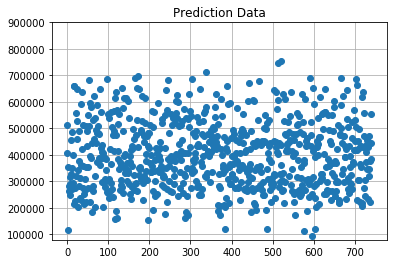

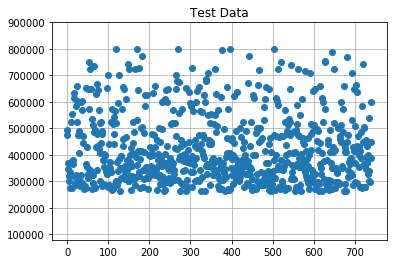

6648377841.319142

In [113]:
#75 predict

percent75Y_pred = reg.predict(percent75X_test)
fig, ax = plt.subplots()

ax.plot(percent75Y_pred, 'o')
ax.grid()
plt.title('Prediction Data')
plt.ylim(80000, 900000)
plt.show()

fig1, ax1 = plt.subplots()

y_test75 = []
for e in percent75Y_test.index:
    y_test75.append(percent75Y_test[e])

ax1.plot(y_test75, 'o')
ax1.grid()
plt.title('Test Data')
plt.ylim(80000, 900000)
plt.show()
mean_squared_error(percent75Y_pred, percent75Y_test)

In [148]:
price = df['sale_price']
percent25X_train = X_train[X_train['sale_price'] <= 164787]
percent50X_train = X_train[X_train['sale_price'] <= 262000][X_train['sale_price'] > 164787]
percent75X_train = X_train[X_train['sale_price'] > 262000]

# percent25Y_train = y_train.iloc[]

print(percent50X_train.index)
# print(len(percent25X_train))
percent25X_train = percent25X_train.drop(columns=['sale_price'])
percent50X_train = percent50X_train.drop(columns=['sale_price'])
percent75X_train = percent75X_train.drop(columns=['sale_price'])
# why?
percent75X_train = percent75X_train.drop(8035)

percent25Y_train = y.iloc[percent25X_train.index]
percent50Y_train = y.iloc[percent50X_train.index]
percent75Y_train = y.iloc[percent75X_train.index]


Int64Index([3422, 5023, 2973, 2476, 2716, 2673, 4350, 3101, 3049, 2447,
            ...
            7850, 2558, 2904, 6396, 4117, 3385, 2433, 3444, 4426,  466],
           dtype='int64', length=1613)
262000.0


/Users/chih/Documents/upenn/cis519/cis519/Project/real-estate-ml/.env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


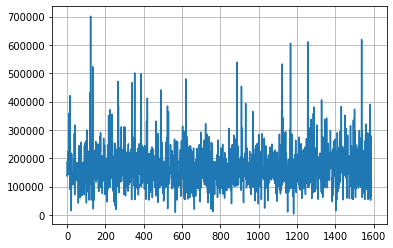

In [149]:
# 25%
# reg = LinearRegression().fit(percent25X_train, percent25Y_train)
y_pred = reg.predict(percent25X_train)
fig, ax = plt.subplots()

ax.plot(y_pred)
ax.grid()
plt.show()

In [150]:
mean_squared_error(y_pred, percent25Y_train)

7906452407.803331

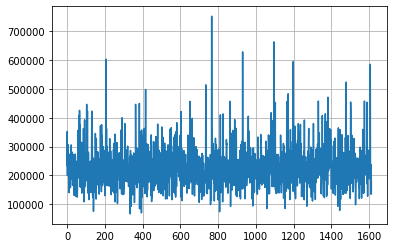

In [151]:
#50%
# reg = LinearRegression().fit(percent25X_train, percent25Y_train)
y_pred = reg.predict(percent50X_train)
fig, ax = plt.subplots()

ax.plot(y_pred)
ax.grid()
plt.show()

In [152]:
mean_squared_error(y_pred, percent50Y_train)

5417503004.432751

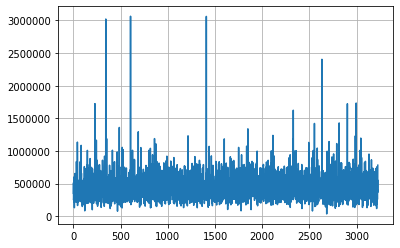

In [153]:
#75%
# reg = LinearRegression().fit(percent25X_train, percent25Y_train)
y_pred = reg.predict(percent75X_train)
fig, ax = plt.subplots()

ax.plot(y_pred)
ax.grid()
plt.show()

In [154]:
mean_squared_error(y_pred, percent75Y_train)

69433168700.76895

## MLP Network

In [210]:
est = MLPRegressor(activation='relu', max_iter=5000)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

/Users/chih/Documents/upenn/cis519/cis519/Project/real-estate-ml/.env/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


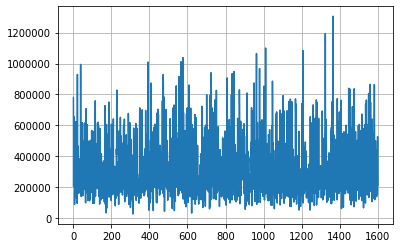

In [231]:
fig, ax = plt.subplots()

ax.plot(y_pred)
ax.grid()
plt.show()

In [180]:
mean_squared_error(y_pred, y_test)

34533030372.994385

## Regression Tree

In [200]:
ext = ExtraTreesRegressor(n_estimators=10, random_state=0, criterion='mse')
ext.fit(X_train, y_train)
y_pred = est.predict(X_test)


ValueError: shapes (1602,30) and (53,100) not aligned: 30 (dim 1) != 53 (dim 0)

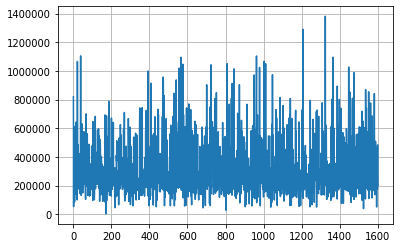

In [143]:
fig, ax = plt.subplots()

ax.plot(y_pred)
ax.grid()
plt.show()

In [211]:
mean_squared_error(y_pred, y_test)

34905812672.60081